<a href="https://colab.research.google.com/github/Amolrakhunde/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition_Amol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Introduction**


## The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.
## In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


#**Problem Statements**


### * We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
### * The solution to this problem is by recognizing facial emotions.


# Data Description

## The data comes from the past Kaggle challenge "Challenges in Representation Learning: Facial Expression Recognition Challenge":

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

### The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The dataset contains approximately 36K images.

## We have 7 categories.



    train
        angry
        disgust
        fear
        happy
        neutral
        sad
        surprise

    validation
        angry
        disgust
        fear
        happy
        neutral
        sad
        surprise

## * 80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.



# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

#**Data Extracting**

We have data in zip file.

So, here we need to extract train and validation from zip file.

Commented out bellow code after execuated once.

In [ ]:
#Import the libraries
# import zipfile
# import os

#Opens the zip file in read mode
# zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CapStone Projects/Face Emotion Recognition/Working Files/archive.zip', 'r')
# #Extracts the files in folder
# zip_ref.extractall('/content/drive/MyDrive/CapStone Projects/Face Emotion Recognition') 
# zip_ref.close()

# **Displaying Images**

In [2]:
picture_size = 48
folder_path = "/content/drive/MyDrive/CapStone Projects/Face Emotion Recognition/images/"
expression = 'disgust'

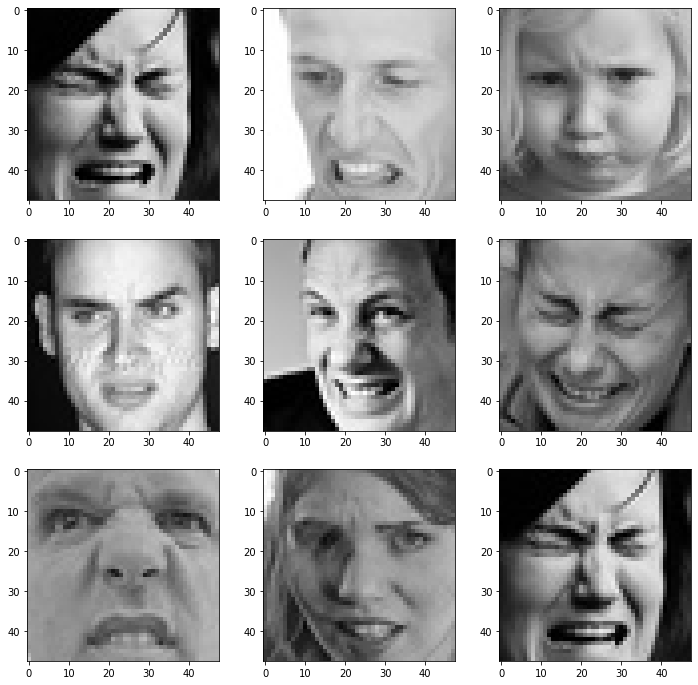

In [3]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# **Making Training and Validation Data**

### Its usually a good idea to manipulate the images with scaling so the model becomes more robust to different images that our data set doesn't have. We can use the ImageDataGenerator to do this automatically for us

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Model Building**

# Basic CNN architecture details:

## **Input layer**: Input layer in CNN should contain image data
## **Convo layer**: Convo layer is sometimes called feature extractor layer because features of the image are get extracted within this layer
## **Pooling layer**: Pooling is used to reduce the dimensionality of each features while retaining the most important information. It is used between two convolution layer
## **Fully CL**: Fully connected layer involves weights, biases, and neurons. It connects neurons in one layer to neurons in another layer. It is used to classify images between different category by training and placed before the output layer
## **Output Layer** - Output layer contains the label which is in the form of one-hot encoded
##Also we use some common techniques for each layer

## **Batch normalization**: improves the performance and stability of CNNs by providing inputs with zero mean and unit variance.

## **Dropout:** reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.

In [5]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# **Fitting the Model with Training and Validation Data**

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [7]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/48
225/225 [==============================] - 8323s 37s/step - loss: 2.0344 - accuracy: 0.2375 - val_loss: 1.6980 - val_accuracy: 0.3300 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - 45s 202ms/step - loss: 1.8312 - accuracy: 0.2968 - val_loss: 1.6734 - val_accuracy: 0.3399 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - 45s 202ms/step - loss: 1.7299 - accuracy: 0.3369 - val_loss: 1.6429 - val_accuracy: 0.3706 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - 45s 200ms/step - loss: 1.6467 - accuracy: 0.3668 - val_loss: 1.5984 - val_accuracy: 0.3932 - lr: 1.0000e-04
Epoch 5/48
225/225 [==============================] - 45s 200ms/step - loss: 1.5906 - accuracy: 0.3887 - val_loss: 1.5175 - val_accuracy: 0.4209 - lr: 1.0000e-04
Epoch 6/48
225/225 [==============================] - 45s 199ms/step - loss: 1.5423 - accuracy: 0.4060 - val_loss: 1.4603 - val_accuracy: 0.4446 - lr: 1.0000e-04
Epoch 7/48
225/225 [========

### At each epoch, Keras checks if our model performed better than during the previous epochs. If it is the case, the new best model weights are saved into a file. This will allow us to load directly the weights of our model without having to re-train it if we want to use it.

# Plotting Accuracy & Loss

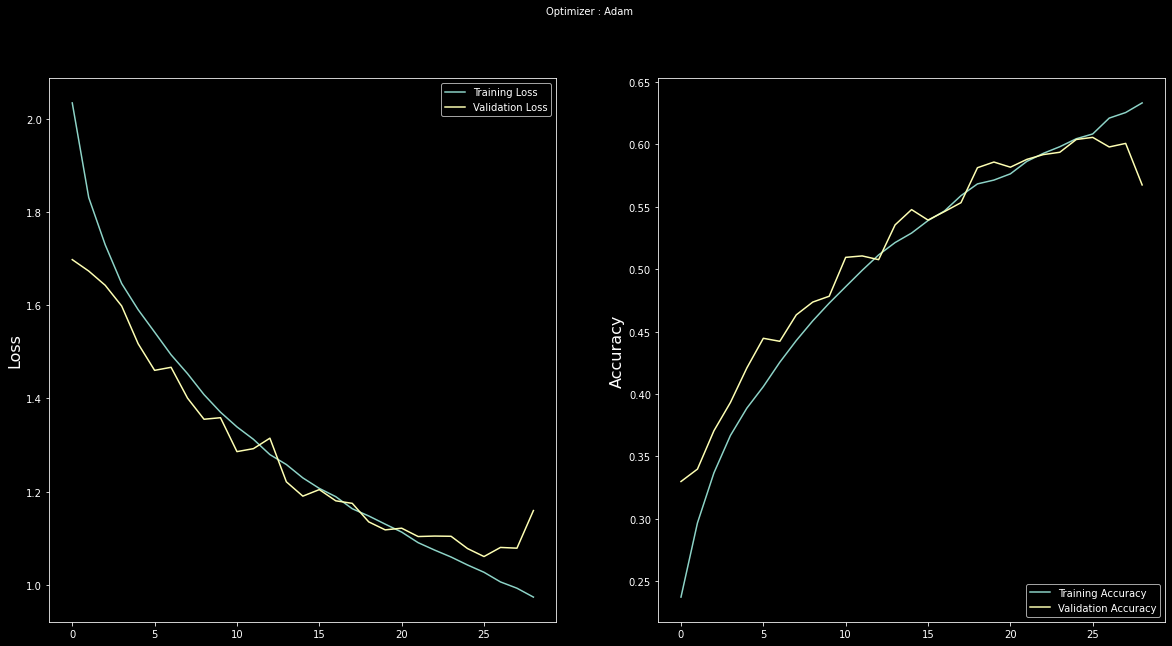

In [8]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


The validation accuracy starts to stabilize nearby 60%.

The training loss is slightly higher than the validation loss for the first epochs which can be surprising. Indeed we are more used to see higher validation losses than training losses in machine learning. Here this is simply due to the presence of dropout, which is only applied during the training phase and not during the validation phase.

We can see that the training loss is becoming much smaller than the validation loss after the 7th-8thth epochs. This means that our model starts to overfit our training dataset after too much iterations. That is why the validation loss does not decrease a lot after. One solution consists in early-stopping the training of the model.

#<b>Conclusion
* Our model is giving an accuracy of 60% on validation set and is robust in that it works well even in a dim light environment.

* The application is able to detect face location and predict the right expression while checking it on a local webcam.

* The front-end of the model was made using streamlit for webapp and running well on local webapp link.

* Finally, we successfully deployed the Streamlit WebApp on Heroku and Streamlit share that runs on a web server.

* Through this model teachers can understand the students' perception during online classes and change the way of teaching if needed by understanding the students’ motive.